We fit a gaussian mixture model with a fixed number of clusters; we then estimate for each cluster the kerneldensity and compare it with the kerneldensity at the same point in a randomized dataset.

In [32]:
%load_ext autoreload
%autoreload 2

import os, sys
import pandas as pd
import numpy as np
import glob
from scipy.spatial.distance import euclidean,cdist

import pylab as plt
from matplotlib.pyplot import get_cmap
%matplotlib inline  

src_dir = os.path.abspath(os.path.join(os.pardir,'personality-types-orig/src'))
sys.path[0] = src_dir

from analysis.cluster_density import gmm_kd
from analysis.data_sample import get_subset
from analysis.density import rho_pval,rho_eff

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data and setup

In [42]:
# TIPI scores - see below for normed scores
fname_read = 'data/TIPI_fa_NEOAC.npy'
arrTIPI =  np.load(fname_read)


# parameters for fitting
n_rep = 10 # number of different initial conditions for optimization
Nc = 15 # this (13) is the number we found in the paper [Melissa - works with TIPI]
n_rep_kd = 1000 # number of randomizations for estaimting density 
bw = -1 # bandwidth for density estimation (-1, estimate from avg nearest-neighbor distance)
N_samples = 10000 # number of pairs of n.n. for estimating bandwidth 


In [43]:
arrTIPI

array([[ 0.58006338,  0.898994  ,  0.44892642,  0.53372388, -0.88832675],
       [ 0.50603069,  0.69710941,  0.84527329, -0.1121367 ,  1.33299156],
       [ 0.49048409,  0.47657985, -1.08828374, -0.22037689, -0.2735073 ],
       ...,
       [-0.76501292, -1.43511877, -0.27862767,  0.40373314,  1.14983515],
       [ 1.88619799, -0.2266281 , -0.77953682,  0.45897336, -0.34496559],
       [ 0.91118037,  0.40816054,  0.2036622 , -1.76339865, -0.6583265 ]])

In [44]:
#####
# z-score the data in each dimension
#####
N_,D_ = np.shape(arrTIPI)
for d in range(D_):
    x_tmp = arrTIPI[:,d]
    x_mu = np.mean(x_tmp)
    x_std = np.std(x_tmp)
    arrTIPI[:,d] = (x_tmp - x_mu)/x_std

# scores are already normed - see TIPI_Scoring.ipynb
# arrTIPI = np.load('data/TIPI_scored_normed_NEOAC.npy')

#####
# get a random subset to reduce processing time
# use line above if you want to fit the whole dataset
#####
arr_x = 1.0*arrTIPI
# arr_x = get_subset(arr_pd,20000) 


In [45]:
arrTIPI

array([[ 0.63898586,  0.97877072,  0.55355663,  0.71825657, -1.04286009],
       [ 0.55743296,  0.7589709 ,  1.04227912, -0.15090748,  1.5648788 ],
       [ 0.54030716,  0.51887154, -1.34192744, -0.29657123, -0.32108664],
       ...,
       [-0.84272245, -1.5624712 , -0.34356675,  0.5433221 ,  1.3498605 ],
       [ 2.07779679, -0.24673907, -0.96122161,  0.61766139, -0.40497581],
       [ 1.0037375 ,  0.4443807 ,  0.25112927, -2.37308602, -0.77284899]])

# Fit

In [53]:
## fit the gmm
dict_result = gmm_kd(Nc,arrTIPI,n_rep,n_rep_kd, bw = bw, N_samples = N_samples)

In [54]:

## the cluster centers
arr_cd = dict_result['cluster']

arr_cov = dict_result['cov']

arr_rho = dict_result['rho'] ## density for each cluster in original dataset
arr_rho_rand = dict_result['rho_rand'] ## density for each cluster in randomized dataset

## the p-value and the enrichment for the kerneldensity 
## in comparison to kd in randomimzed datat
arr_rho_eff = rho_eff(arr_rho,arr_rho_rand)
arr_rho_pval = rho_pval(arr_rho,arr_rho_rand)

In [55]:
del arr_cd_sig
arr_cd_sig = np.empty([1,5])
arr_cd_sig_id = []

Cluster 1 
N:0.76 | E:-0.78 | O:0.42 | A:0.23 | C:-1.30
p-value:0.00 | enrichment:1.34
---
Cluster 2 
N:0.65 | E:-0.84 | O:0.67 | A:0.56 | C:0.47
p-value:0.78 | enrichment:0.95
---
Cluster 3 
N:-1.01 | E:-0.73 | O:-0.25 | A:-1.34 | C:0.35
p-value:0.00 | enrichment:1.39
---
Cluster 4 
N:0.70 | E:-0.87 | O:-1.16 | A:0.10 | C:0.43
p-value:0.02 | enrichment:1.18
---
Cluster 5 
N:-0.99 | E:-0.73 | O:0.58 | A:0.30 | C:0.24
p-value:0.32 | enrichment:1.03
---
Cluster 6 
N:0.74 | E:-0.64 | O:0.37 | A:-0.98 | C:0.37
p-value:0.90 | enrichment:0.90
---
Cluster 7 
N:-0.96 | E:0.98 | O:0.53 | A:0.36 | C:0.36
p-value:0.00 | enrichment:1.46
---
Cluster 8 
N:0.42 | E:-0.46 | O:-0.86 | A:-0.68 | C:-1.62
p-value:0.16 | enrichment:1.22
---
Cluster 9 
N:-1.05 | E:0.21 | O:0.23 | A:0.03 | C:-1.67
p-value:0.21 | enrichment:1.13
---
Cluster 10 
N:-0.91 | E:0.82 | O:-1.28 | A:0.13 | C:0.34
p-value:0.02 | enrichment:1.24
---
Cluster 11 
N:0.74 | E:0.97 | O:0.58 | A:0.05 | C:-1.41
p-value:0.01 | enrichment:1.31


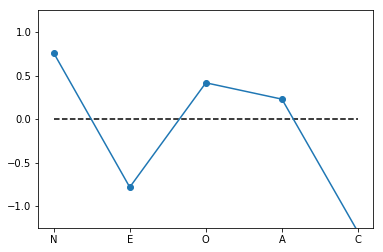

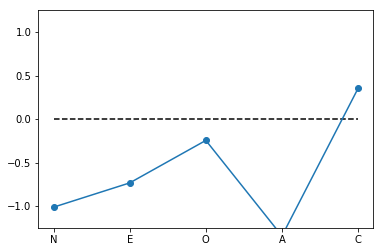

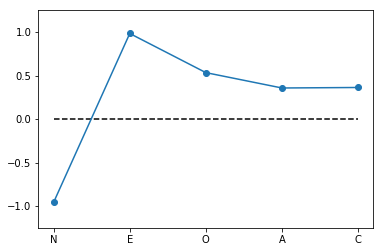

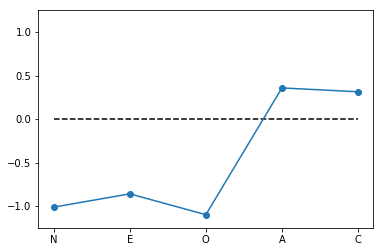

In [56]:
for i_Nc in range(Nc):
    print('Cluster %s '%(i_Nc+1))
    print('N:%.2f | E:%.2f | O:%.2f | A:%.2f | C:%.2f'%
          (arr_cd[i_Nc,0],arr_cd[i_Nc,1],arr_cd[i_Nc,2],arr_cd[i_Nc,3],arr_cd[i_Nc,4]) )
    print('p-value:%.2f | enrichment:%.2f'%
          (arr_rho_pval[i_Nc],arr_rho_eff[i_Nc]))
    if arr_rho_pval[i_Nc]<=.01 and arr_rho_eff[i_Nc]>=1.25:
        plt.figure(i_Nc)
        plt.plot(['N','E','O','A','C'],arr_cd[i_Nc], marker='o')
        plt.ylim(-1.25,1.25)
        plt.hlines(y=0,xmin='N',xmax='C',linestyles='dashed')
        arr_cd_sig = np.vstack((arr_cd_sig,arr_cd[i_Nc]))
        arr_cd_sig_id.append(i_Nc)
    print('---')
    

In [57]:
arr_cd_sig[1:,]

array([[ 0.76121088, -0.78317152,  0.41711005,  0.22915072, -1.2988785 ],
       [-1.01237059, -0.73361016, -0.24517022, -1.34343959,  0.35195018],
       [-0.95596341,  0.98410019,  0.53402122,  0.35746483,  0.36325226],
       [-1.01277321, -0.85952354, -1.09941738,  0.35830382,  0.3137447 ]])

In [58]:
np.save('Pascal_clusters_Nc15_fa_normed_1.npy',arr_cd_sig[1:,])

In [62]:
arr_cov[3].diagonal()

array([0.34060003, 0.1950959 , 0.46481228, 0.92310431, 0.42222254])

In [100]:
avg_cov = arr_cov[3].diagonal()
avg = np.array([ 0.45833435,  0.39819   , -0.75955408, -0.19528638, -0.29663314])
euclidean(avg+avg_cov,avg-avg_cov)

1.4598680565370348

In [101]:
avg_cov

array([0.13080468, 0.33042128, 0.27485486, 0.16079605, 0.55237219])

# Plot the result

for each cluster we plot the p-value and the enrichment

Text(0.5, 0, 'Enrichment, $\\rho/\\langle \\tilde{\\rho} \\rangle$')

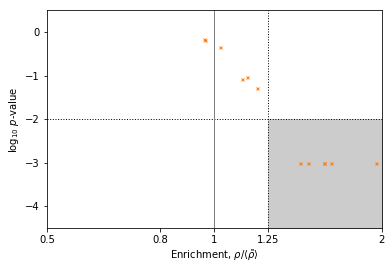

In [80]:
pval_crit = 0.01
eff_crit = 1.25
cmap = get_cmap('tab10')
c_ = cmap(1)
c_shade=str(0.8)
cmap = get_cmap('tab10')


f = plt.figure()

ax = f.add_subplot(111)
x = np.log10(arr_rho_eff + 0.0*np.random.random(size=len(arr_rho_eff))   ) 
y = np.log10(arr_rho_pval)
ax.plot(x,y,ms=3,lw=0,marker='x',color=c_)
# ax.fill_between(x,0.001+0.0*x,1.0+0.0*x,where=y<=pval_crit,color=c_shade)
# ax.set_yscale('log')

#     xmin = 0.
xmax = np.log10(2.)
xmin=-xmax

ymin = -4.5
ymax=0.5
x = np.linspace(xmin,xmax,10)
y = np.log10(pval_crit)+0.0*x
ax.plot(x,y,ms=0,lw=1,ls=':',marker='o',color='black')

x = [np.log10(eff_crit),np.log10(eff_crit)]
y = [ymin,ymax]
ax.plot(x,y,ms=0,lw=1,ls=':',marker='o',color='black')

x = [0,0]
y = [ymin,ymax]
ax.plot(x,y,ms=0,lw=1,ls='-',marker='o',color=str(0.5))#,alpha=0.5)

x = np.linspace(np.log10(eff_crit),xmax,10)
y1 = ymin + 0.0*x
y2 = np.log10(pval_crit) + 0.0*x
ax.fill_between(x,y1,y2,color=c_shade)

# # ax.set_xlabel(r'cluster index')
ax.set_ylabel(r'$\log_{10}$ $p$-value')
# ax.set_yscale('log')

x_marks = np.log10( np.array([0.5,0.8, 1., 1.25,2.]) )
x_labels = ['0.5','0.8','1','1.25','2']
ax.set_xticks(x_marks)
ax.set_xticklabels(x_labels)
# ax.set_xticklabels([])
ax.set_yticks([-4,-3,-2,-1,0])
# ax.set_yticklabels([r'$-3$',r'$-2$',r'$-1$',r'$0$'])
ax.set_ylim(-4.5,0.5)
ax.set_xlim(xmin,xmax)



#     ax.locator_params(axis = 'x',nbins=5)
ax.set_xlabel(r'Enrichment, $\rho/\langle \tilde{\rho} \rangle$',labelpad=3)


In [79]:
src_dir

'/Users/melissawessel/Documents/dev/python/personality-types-orig/src'